In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import euclidean as scipy_euclidean, cityblock, minkowski as scipy_minkowski
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

In [76]:
data = {
    "Fruit ID": [1, 2, 3, 4, 5, 6],
    "Weight (grams)": [180, 200, 150, 170, 160, 140],
    "Sweetness Level": [7, 6, 4, 5, 6, 3],
    "Label (Fruit Type)": ["Apple", "Apple", "Orange", "Orange", "Apple", "Orange"]
}
df = pd.DataFrame(data)

The predicted label for the new fruit (custom KNN) is: 0
Calculated Distances (Euclidean, Manhattan, Minkowski):
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: 1
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: 0
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: 0
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: 1
Euclidean: 25.12, Manhattan: 27.50, Minkowski: 25.01, Label: 1
Euclidean: 35.00, Manhattan: 35.50, Minkowski: 35.00, Label: 0

The predicted label for the new fruit (scikit-learn KNN) is: Orange

Calculated Distances (using scikit-learn distance functions):
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: 0
Euclidean: 35.00, Manhattan: 35.50, Minkowski: 35.00, Label: 0
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: 1
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: 1
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: 0
Euclidean: 25.12, Manhattan: 27.50, Minkowski: 25.01, Label: 1


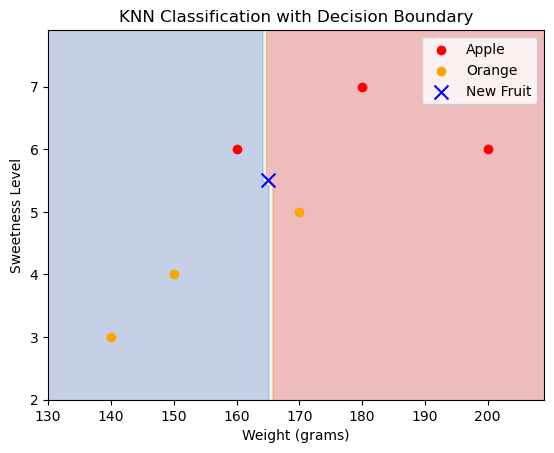

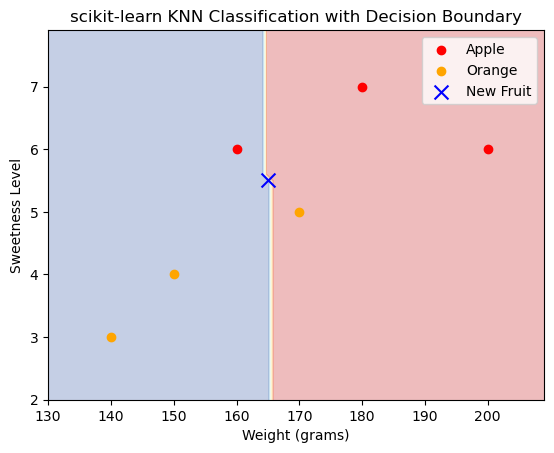

With k=1, the predicted label (custom KNN) is: 1
With k=5, the predicted label (custom KNN) is: 1


In [77]:
le = LabelEncoder()
df['Label (Fruit Type)'] = le.fit_transform(df['Label (Fruit Type)'])
X = df[['Weight (grams)', 'Sweetness Level']].values
y = df['Label (Fruit Type)'].values
new_fruit = np.array([[165, 5.5]])
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.data = None
    def fit(self, df):
        self.data = df
    def _euclidean_distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))
    def _manhattan_distance(self, p1, p2):
        return np.sum(np.abs(p1 - p2))
    def _minkowski_distance(self, p1, p2, r=3):
        return np.power(np.sum(np.abs(p1 - p2) ** r), 1/r)
    def predict(self, p):
        distances = []
        for index, row in self.data.iterrows():
            euclidean_d = self._euclidean_distance(np.array([row["Weight (grams)"], row["Sweetness Level"]]), np.array(p))
            manhattan_d = self._manhattan_distance(np.array([row["Weight (grams)"], row["Sweetness Level"]]), np.array(p))
            minkowski_d = self._minkowski_distance(np.array([row["Weight (grams)"], row["Sweetness Level"]]), np.array(p))
            distances.append((euclidean_d, manhattan_d, minkowski_d, row["Label (Fruit Type)"]))
        distances.sort(key=lambda x: x[0])
        nearest_labels = [label for _, _, _, label in distances[:self.k]]
        most_common = Counter(nearest_labels).most_common(1)
        predicted_label = most_common[0][0] if most_common else None
        return predicted_label, distances
knn_custom = KNN(k=3)
knn_custom.fit(df)
label, calculated_distances = knn_custom.predict(np.array([new_fruit[0][0], new_fruit[0][1]]))
print(f"The predicted label for the new fruit (custom KNN) is: {label}")
print("Calculated Distances (Euclidean, Manhattan, Minkowski):")
for euclidean, manhattan, minkowski, fruit_label in calculated_distances:
    print(f"Euclidean: {euclidean:.2f}, Manhattan: {manhattan:.2f}, Minkowski: {minkowski:.2f}, Label: {fruit_label}")
knn_sklearn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_sklearn.fit(X, y)
predicted_label_sklearn = knn_sklearn.predict(new_fruit)
predicted_fruit_sklearn = le.inverse_transform(predicted_label_sklearn)
print(f"\nThe predicted label for the new fruit (scikit-learn KNN) is: {predicted_fruit_sklearn[0]}")
print("\nCalculated Distances (using scikit-learn distance functions):")
for i, row in df.iterrows():
    fruit_vector = np.array([row["Weight (grams)"], row["Sweetness Level"]])
    euclid_dist_value = scipy_euclidean(fruit_vector, new_fruit[0]) 
    manhattan_dist_value = cityblock(fruit_vector, new_fruit[0])
    minkowski_dist_value = scipy_minkowski(fruit_vector, new_fruit[0], 3)
    print(f"Euclidean: {euclid_dist_value:.2f}, Manhattan: {manhattan_dist_value:.2f}, Minkowski: {minkowski_dist_value:.2f}, Label: {row['Label (Fruit Type)']}")
def plot_decision_boundary(knn, df, new_fruit):
    label_encoding = {'Apple': 0, 'Orange': 1}
    x_min, x_max = df["Weight (grams)"].min() - 10, df["Weight (grams)"].max() + 10
    y_min, y_max = df["Sweetness Level"].min() - 1, df["Sweetness Level"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))
    Z = np.array([knn.predict(np.array([x, y]))[0] for x, y in zip(np.ravel(xx), np.ravel(yy))])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(df[df["Label (Fruit Type)"] == 0]["Weight (grams)"],
                df[df["Label (Fruit Type)"] == 0]["Sweetness Level"],
                color='red', label='Apple')
    plt.scatter(df[df["Label (Fruit Type)"] == 1]["Weight (grams)"],
                df[df["Label (Fruit Type)"] == 1]["Sweetness Level"],
                color='orange', label='Orange')
    plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')
    plt.title("KNN Classification with Decision Boundary")
    plt.xlabel("Weight (grams)")
    plt.ylabel("Sweetness Level")
    plt.legend()
    plt.show()
plot_decision_boundary(knn_custom, df, new_fruit[0])
def plot_decision_boundary_sklearn(knn, df, new_fruit):
    x_min, x_max = df["Weight (grams)"].min() - 10, df["Weight (grams)"].max() + 10
    y_min, y_max = df["Sweetness Level"].min() - 1, df["Sweetness Level"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(df[df["Label (Fruit Type)"] == 0]["Weight (grams)"],
                df[df["Label (Fruit Type)"] == 0]["Sweetness Level"],
                color='red', label='Apple')
    plt.scatter(df[df["Label (Fruit Type)"] == 1]["Weight (grams)"],
                df[df["Label (Fruit Type)"] == 1]["Sweetness Level"],
                color='orange', label='Orange')
    plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')
    plt.title("scikit-learn KNN Classification with Decision Boundary")
    plt.xlabel("Weight (grams)")
    plt.ylabel("Sweetness Level")
    plt.legend()
    plt.show()
plot_decision_boundary_sklearn(knn_sklearn, df, new_fruit[0])
for k in [1, 5]:
    knn_custom.k = k
    label, _ = knn_custom.predict(np.array([new_fruit[0][0], new_fruit[0][1]]))
    print(f"With k={k}, the predicted label (custom KNN) is: {label}")


In [78]:
data = {
    'Patient ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = 0
    for i in range(len(elements)):
        probability = counts[i] / np.sum(counts)
        entropy_val -= probability * math.log2(probability)
    return entropy_val
def info_gain(data, split_attribute_name, target_name="Diagnosis"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = 0
    for i in range(len(vals)):
        subset = data[data[split_attribute_name] == vals[i]]
        weighted_entropy += (counts[i] / np.sum(counts)) * entropy(subset[target_name])
    return total_entropy - weighted_entropy
def id3(data, original_data, features, target_name="Diagnosis", parent_node_class=None):
    # If all target values are the same, return that value
    if len(np.unique(data[target_name])) <= 1:
        return np.unique(data[target_name])[0]
    
    # If dataset is empty, return the mode of the original dataset
    elif len(data) == 0:
        return np.unique(original_data[target_name])[np.argmax(np.unique(original_data[target_name], return_counts=True)[1])]
    
    # If there are no more features, return the mode target feature value of the parent node
    elif len(features) == 0:
        return parent_node_class
    
    # Otherwise, continue to build the tree
    else:
        # Set the parent node class to the mode target feature value of the current node
        parent_node_class = np.unique(data[target_name])[np.argmax(np.unique(data[target_name], return_counts=True)[1])]
        
        # Select the feature with the highest information gain
        item_values = [info_gain(data, feature, target_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        # Create the tree structure
        tree = {best_feature: {}}
        
        # Remove the best feature from the feature set
        features = [i for i in features if i != best_feature]
        
        # Grow the tree branch for each feature value
        for value in np.unique(data[best_feature]):
            sub_data = data[data[best_feature] == value]
            subtree = id3(sub_data, original_data, features, target_name, parent_node_class)
            tree[best_feature][value] = subtree
        
        return tree

# Get the list of features
features = ['Age', 'Blood Pressure', 'Cholesterol']

# Build the decision tree using the ID3 algorithm
tree = id3(df, df, features)

print("Decision Tree:", tree)

# Prediction function using the decision tree
def predict(tree, sample):
    for key in list(tree.keys()):
        value = sample[key]
        tree = tree[key][value]
        if isinstance(tree, dict):
            return predict(tree, sample)
        else:
            return tree

# Predict for a 50-year-old patient with low blood pressure and normal cholesterol
sample = {'Age': 50, 'Blood Pressure': 'Low', 'Cholesterol': 'Normal'}
prediction = predict(tree, sample)

print(f"The prediction for the new patient is: {prediction}")

Decision Tree: {'Age': {25: 'Healthy', 30: 'Sick', 35: 'Healthy', 40: 'Sick', 45: 'Healthy', 50: 'Sick', 55: 'Healthy', 60: 'Sick', 65: 'Sick'}}
The prediction for the new patient is: Sick


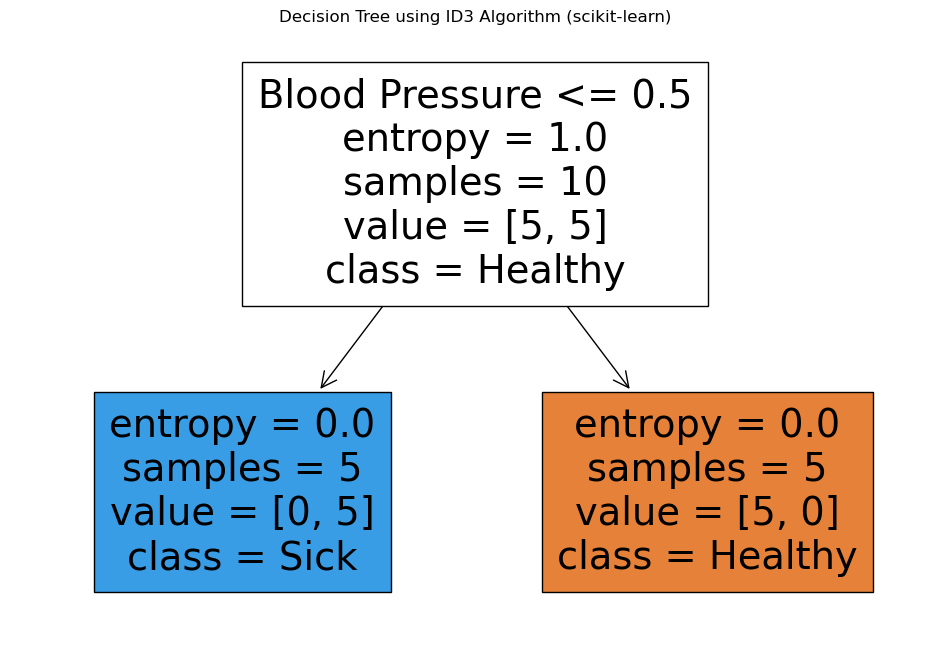

The prediction for the new patient is: Healthy
Age: 0.00
Blood Pressure: 1.00
Cholesterol: 0.00

Explanation of the first few splits:
The first split is based on 'Blood Pressure', which has the highest information gain.



/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [79]:
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_diag = LabelEncoder()

df['Blood Pressure'] = le_bp.fit_transform(df['Blood Pressure'])  # High -> 0, Low -> 1
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])      # High -> 0, Normal -> 1
df['Diagnosis'] = le_diag.fit_transform(df['Diagnosis'])          # Sick -> 1, Healthy -> 0

# Separate features and target
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

# Initialize the DecisionTreeClassifier with entropy criterion (ID3)
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train the decision tree
tree_clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Age', 'Blood Pressure', 'Cholesterol'], class_names=['Healthy', 'Sick'], filled=True)
plt.title("Decision Tree using ID3 Algorithm (scikit-learn)")
plt.show()

# Prediction for a 50-year-old patient with low blood pressure and normal cholesterol
new_patient = [[50, le_bp.transform(['Low'])[0], le_chol.transform(['Normal'])[0]]]
prediction = tree_clf.predict(new_patient)

# Decode the prediction back to Healthy or Sick
predicted_diagnosis = le_diag.inverse_transform(prediction)
print(f"The prediction for the new patient is: {predicted_diagnosis[0]}")

# Display feature importance
feature_importances = tree_clf.feature_importances_
for name, importance in zip(['Age', 'Blood Pressure', 'Cholesterol'], feature_importances):
    print(f"{name}: {importance:.2f}")

# Explain the first few splits
print("\nExplanation of the first few splits:")
print(f"The first split is based on '{['Age', 'Blood Pressure', 'Cholesterol'][tree_clf.tree_.feature[0]]}', "
      f"which has the highest information gain.\n")
